In [1]:
%load_ext autotime
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import Input, Dense, Conv1D
from keras.models import Model
from keras.datasets import mnist
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
temp=pd.read_csv('trimmedData.csv')

time: 185 ms


In [3]:
X=temp['X']
X=X.values.reshape(-1,1)
Y=temp['Y']

time: 1.02 ms


In [4]:
gtemp=temp.groupby('Y')
#initializing y


time: 6.98 ms


In [5]:
#dividing all on the basis of their label
#get_group(1) reutrns the group with y label 1
g1=gtemp.get_group(1) 
g2=gtemp.get_group(2)
g32=gtemp.get_group(32)
g37=gtemp.get_group(37)
g38=gtemp.get_group(38)

time: 48.9 ms


In [6]:
#n_features =1 (amplitude)
y=[]
n_features=1
#initialise total data point to 0
totaldp=0
#window size =250 ==1 sec
window=250

#get amplitude values from X
X=g1['X']
#number of data points = number of rows in X / window
data_points=X.shape[0]//window
#appending y 
y=np.append(y,[1]*data_points)
#updating total datapoints
totaldp+=data_points
#removing left points
X=X.head(data_points*window)
#converting to array
X=np.array(X)
#reshaping it to data_points,window,n_features(n,250,1)
X=np.reshape(X,((data_points,window,n_features)))
#grouped X is the new amplitude chunk
groupedX=X

#same procedure for label 2
X=g2['X']
data_points=X.shape[0]//window
y=np.append(y,[2]*data_points)
totaldp+=data_points
X=X.head(data_points*window)
X=np.array(X)
X=np.reshape(X,((data_points,window,n_features)))
groupedX=np.append(groupedX,X)

#same procedure for label 32
X=g32['X']
data_points=X.shape[0]//window
y=np.append(y,[32]*data_points)
totaldp+=data_points
X=X.head(data_points*window)
X=np.array(X)
X=np.reshape(X,((data_points,window,n_features)))
groupedX=np.append(groupedX,X)


X=g37['X']
data_points=X.shape[0]//window
y=np.append(y,[37]*data_points)
totaldp+=data_points
X=X.head(data_points*window)
X=np.array(X)
X=np.reshape(X,((data_points,window,n_features)))
groupedX=np.append(groupedX,X)


X=g38['X']
data_points=X.shape[0]//window
y=np.append(y,[38]*data_points)
totaldp+=data_points
X=X.head(data_points*window)
X=np.array(X)
X=np.reshape(X,((data_points,window,n_features)))
groupedX=np.append(groupedX,X)


groupedX=np.reshape(groupedX,((totaldp,window)))

time: 17 ms


In [7]:
np.mean(groupedX[2000])
me=np.mean(groupedX,axis=1)
groupedX=(groupedX.T-me).T
np.mean(groupedX[2000])
x=groupedX

time: 8.98 ms


In [8]:
encoding_dim = 10
 
# this is our input placeholder
input_img = Input(shape=(250,))
# "encoded" is the encoded representation of the input
encoded0=Dense(125,activation='linear')(input_img)
encoded1=Dense(60,activation='linear')(encoded0)
encoded = Dense(encoding_dim, activation='linear')(encoded1)
# "decoded" is the lossy reconstruction of the input
decoded0=Dense(60,activation='linear')(encoded)
decoded1=Dense(125,activation='linear')(decoded0)
decoded = Dense(250, activation='linear')(decoded1)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)
# create a placeholder for an encoded (10-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-3]
# create the decoder model
decoder_layer1 = autoencoder.layers[-1]
decoder_layer2 = autoencoder.layers[-2]
encoded_input1 = Input(shape=(125,))
encoded_input2 = Input(shape=(60,))
decoder1 = Model(encoded_input1, decoder_layer1(encoded_input1))
decoder2 = Model(encoded_input2, decoder_layer2(encoded_input2))
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='mse')#binary_crossentropy

Instructions for updating:
Colocations handled automatically by placer.
time: 188 ms


In [9]:
autoencoder.fit(x,x,
epochs=12,
batch_size=10)

Instructions for updating:
Use tf.cast instead.
Epoch 1/12
2628/2628 [==============================] - 1s 239us/step - loss: 95762.5710
Epoch 2/12
2628/2628 [==============================] - 0s 123us/step - loss: 104393.7652
Epoch 3/12
2628/2628 [==============================] - 0s 120us/step - loss: 307268.3981
Epoch 4/12
2628/2628 [==============================] - 0s 121us/step - loss: 437656.6604
Epoch 5/12
2628/2628 [==============================] - 0s 121us/step - loss: 1198858.8646
Epoch 6/12
2628/2628 [==============================] - 0s 121us/step - loss: 1210209.8295
Epoch 7/12
2628/2628 [==============================] - 0s 123us/step - loss: 1219963.0637
Epoch 8/12
2628/2628 [==============================] - 0s 141us/step - loss: 187831.3827
Epoch 9/12
2628/2628 [==============================] - 0s 124us/step - loss: 112482.6400
Epoch 10/12
2628/2628 [==============================] - 0s 122us/step - loss: 87712.9301
Epoch 11/12
2628/2628 [===========================

time: 4.71 s


In [10]:
encoded_layer=encoder.predict(x)
decoded_output1=decoder.predict(encoded_layer)
decoded_output2=decoder2.predict(decoded_output1)
# create the decoder model
decoded_output2=decoder1.predict(decoded_output2)


time: 170 ms


In [11]:
encoded_layer[0]

array([-828.7106 ,  250.04837,  452.23245,   90.13972,  633.70166,
        -71.05313,  244.03838, -291.60413,  128.37813,  261.49655],
      dtype=float32)

time: 2 ms


In [12]:
print(x[0].shape)
print(decoded_output2[0].shape)

(250,)
(250,)
time: 8.98 ms


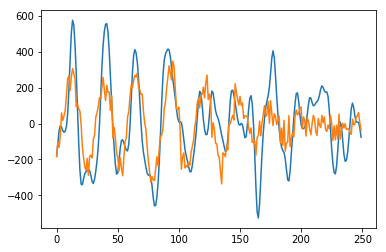

time: 181 ms


In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
q=500
plt.plot(range(250),x[q],label=1)
plt.plot(range(250),decoded_output2[q],label=2)

In [14]:
encoded_layer.shape

(2628, 10)

time: 2.97 ms


In [15]:
y.shape

(2628,)

time: 6.98 ms


print(me[0])
groupedX=np.reshape(groupedX,((totaldp,window,1)))
X=groupedX
#max value of colomn (axis specifis row or colomn)
a=np.max(X,axis=1)
#concatinate with minimum, second axis is for concatinate into colomn
a=np.concatenate((a,np.min(X,axis=1)),axis=1)
a=np.concatenate((a,np.average(X,axis=1)),axis=1)
#standard deviation
a=np.concatenate((a,np.std(X,axis=1)),axis=1)
#fft real part
a=np.concatenate((a,np.real(np.fft.rfftn(X,axes=(0,1)))[:,0]),axis=1)
X=a
X.shape

In [16]:
#me=me.reshape(2628,1)
#print(encoded_layer.shape)
#print(me.shape)
#encoded_layer=np.concatenate((encoded_layer,me),axis=1)
#XX=me
X_train, X_test, y_train, y_test = train_test_split(encoded_layer, y, test_size=0.33)
print(X_test.shape)

(868, 10)
time: 8.98 ms


In [17]:
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

time: 5.98 ms


In [41]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
print(clf.score(X_train,y_train))
y_pre=clf.predict(X_test)

0.47556818181818183
time: 5.98 ms


In [42]:
actual=y_test
predicted=y_pre
results = confusion_matrix(actual, predicted) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(actual, predicted) )
#print ('Report : ')
print (classification_report(actual, predicted) )

Confusion Matrix :
[[423   0   0   0   0]
 [ 81   0   0   0   0]
 [  3   0   0   0   0]
 [256   0   0   0   0]
 [105   0   0   0   0]]
Accuracy Score : 0.4873271889400922
              precision    recall  f1-score   support

         1.0       0.49      1.00      0.66       423
         2.0       0.00      0.00      0.00        81
        32.0       0.00      0.00      0.00         3
        37.0       0.00      0.00      0.00       256
        38.0       0.00      0.00      0.00       105

    accuracy                           0.49       868
   macro avg       0.10      0.20      0.13       868
weighted avg       0.24      0.49      0.32       868

time: 9.95 ms


C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [25]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)
y_pre=clf.predict(X_test)

time: 64.9 ms


In [26]:
actual=y_test
predicted=y_pre
results = confusion_matrix(actual, predicted) 
print ('Confusion Matrix :')
print(results) 
print ('Accuracy Score :',accuracy_score(actual, predicted) )
#print ('Report : ')
print (classification_report(actual, predicted) )

Confusion Matrix :
[[318  12   0  81  12]
 [ 64   2   0  10   5]
 [  1   0   0   2   0]
 [169  14   0  65   8]
 [ 68   8   0  23   6]]
Accuracy Score : 0.4504608294930876
              precision    recall  f1-score   support

         1.0       0.51      0.75      0.61       423
         2.0       0.06      0.02      0.03        81
        32.0       0.00      0.00      0.00         3
        37.0       0.36      0.25      0.30       256
        38.0       0.19      0.06      0.09       105

    accuracy                           0.45       868
   macro avg       0.22      0.22      0.21       868
weighted avg       0.38      0.45      0.40       868

time: 11 ms


C:\Users\Babbar\Anaconda3\envs\tf-gpu\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
